# 1. Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# To use the os.path.join function by defining the path
path = r'/Users/oluwaseunodusanya/Desktop/06.2023_Instacart Basket Analysis'

In [3]:
# Import ords_prods_custs Data
df_ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs.pkl'))

In [4]:
df_ords_prods_custs.head()

,user_id,First Name,Surname,Gender,STATE,Age,date_joined,n_dependants,Family_status,income,...,price_range_loc,Busiest day,Busiest days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


In [5]:
df_ords_prods_custs.shape

(30629741, 33)

In [6]:
df_ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30629741 entries, 0 to 30629740
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   user_id                object 
 1   First Name             object 
 2   Surname                object 
 3   Gender                 object 
 4   STATE                  object 
 5   Age                    int64  
 6   date_joined            object 
 7   n_dependants           int64  
 8   Family_status          object 
 9   income                 int64  
 10  order_id               int64  
 11  eval_set               object 
 12  order_number           int64  
 13  orders_day_of_week     int64  
 14  order_hour_of_day      int64  
 15  days_since_last_order  float64
 16  product_id             int64  
 17  add_to_cart_order      int64  
 18  reordered              int64  
 19  product_name           object 
 20  aisle_id               int64  
 21  department_id          int64  
 22  prices          

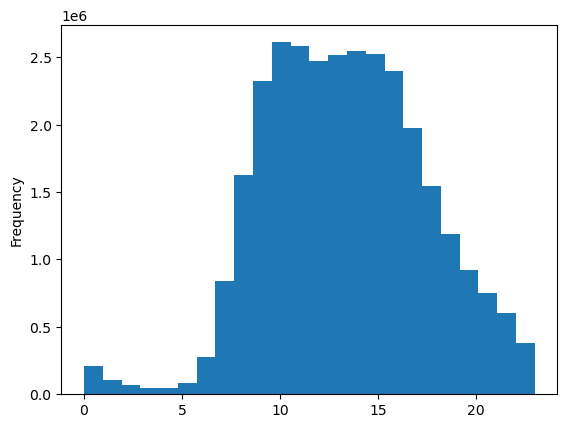

In [7]:
# 3 To create histogram for  order hour of day
hist = hist_order_hour_of_day = df_ords_prods_custs['order_hour_of_day'].plot.hist(bins = 24)

#### The histogram reveals that the peak hours of ordering at instacart are approx 9 am to 6 pm and steadily declines after 7 pm through the night. 

In [8]:
# To export the histogram chart
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hod.png'))

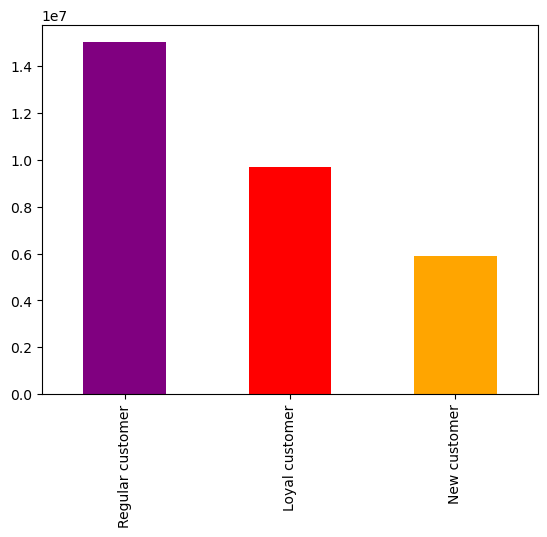

In [9]:
# 4 To create bar chart for  loyalty_flag
bar = df_ords_prods_custs['loyalty_flag'].value_counts().plot.bar(color =['purple', 'red', 'orange'])

In [10]:
# To export the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [19]:
# Step 5 - To create line chart of prices over order hour of day, create a sample by creating list of random floating numbers holding true/false to the test np.random.rant() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_custs)) <= 0.7

In [20]:
dev

array([False,  True, False, ..., False,  True,  True])

In [23]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_custs[dev]

In [24]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_custs[~dev]

In [25]:
len(big) + len(small)

30629741

In [26]:
# To create dataframe for the small subset only 
df = small[['order_hour_of_day','prices']]

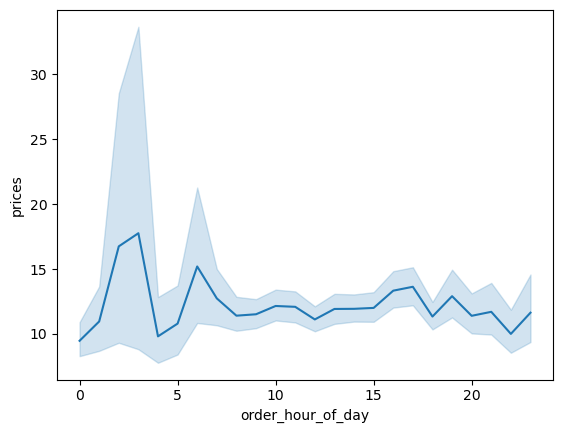

In [27]:
# To create line chart for the small subset
line = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')

#### Orders that costs $15 and above were bought mostls around 2 - 3 am; also around 6 am. Other hours of the day recorded sales of products below $15

In [28]:
# To export the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_hod_prices.png'))

In [30]:
# Step 6 - To create line chart of age over family situation, create dataframe for the small subset only 
df_2 = small[['Age','Family_status']]

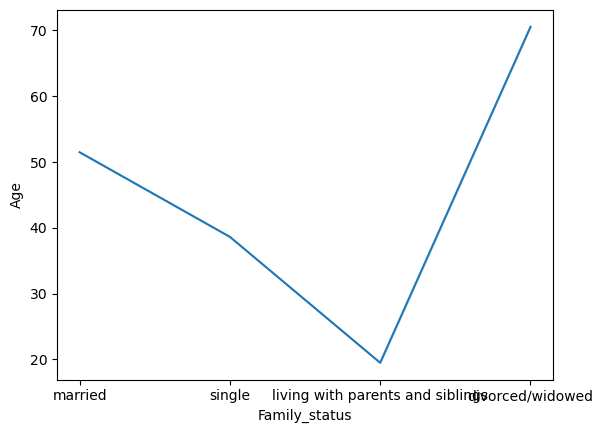

In [32]:
# To create line chart for the small subset
line_2 = sns.lineplot(data = df_2, x = 'Family_status',y = 'Age')

In [34]:
df_ords_prods_custs['Family_status'].value_counts()

married                             21509211
single                               5019732
divorced/widowed                     2629966
living with parents and siblings     1470832
Name: Family_status, dtype: int64

In [35]:
df_3 = small[['n_dependants','Age']]

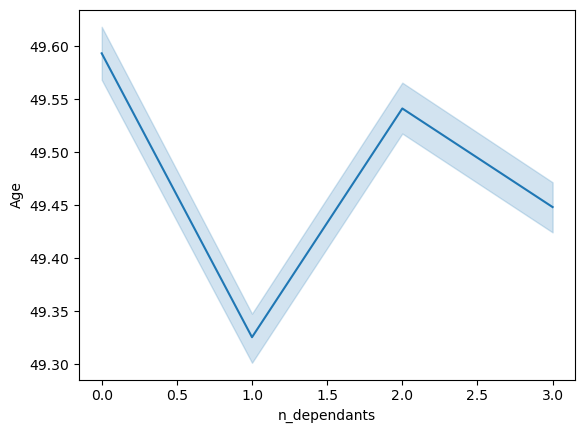

In [37]:
# To create line chart for the small subset
line_3 = sns.lineplot(data = df_3, x = 'n_dependants',y = 'Age')

#### Majority of Instacart customers are people in the older population 

In [42]:
# To export the line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_2_age_Family_status.png'))

In [43]:
# To export the line chart
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_3_age_n_dependants.png'))

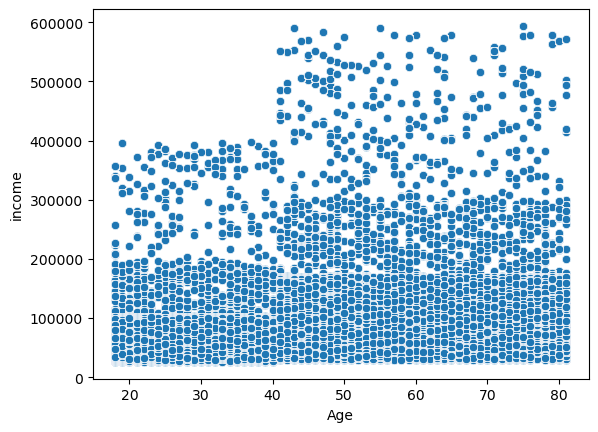

In [44]:
# create a scatterplot
Scatter_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df_ords_prods_custs)

#### Customers' income increase above 400,000 with increasing age after 40 years

In [45]:
# To export the scatterplot
Scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Scatter_age_income.png'))